In [44]:
import torchvision
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sn
from PIL import Image
import torchvision.transforms as transforms

In [26]:
path_train = {'with_mask' : './train/with_mask', 'without_mask': './train/without_mask', 'mask_weared_incorrect': './train/with_incorrect'}
path_test = {'with_mask' : './test/with_mask', 'without_mask': './test/without_mask', 'mask_weared_incorrect': './test/with_incorrect'}
path_validation = {'with_mask' : './validation/with_mask', 'without_mask': './validation/without_mask', 'mask_weared_incorrect': './validation/with_incorrect'}

path_images = './images'

In [3]:
df = pd.read_csv('facemask_dataset.csv')
df

,class,xmin,ymin,xmax,ymax,filename
0,without_mask,79,105,109,142,maksssksksss0.png
1,with_mask,185,100,226,144,maksssksksss0.png
2,without_mask,325,90,360,141,maksssksksss0.png
3,with_mask,321,34,354,69,maksssksksss1.png
4,with_mask,224,38,261,73,maksssksksss1.png
...,...,...,...,...,...,...
4067,with_mask,263,62,287,85,maksssksksss98.png
4068,with_mask,344,80,377,106,maksssksksss98.png
4069,mask_weared_incorrect,181,54,273,162,maksssksksss99.png
4070,with_mask,99,87,176,165,maksssksksss99.png


E:\Preparation\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


with_mask                3232
without_mask              717
mask_weared_incorrect     123
Name: class, dtype: int64

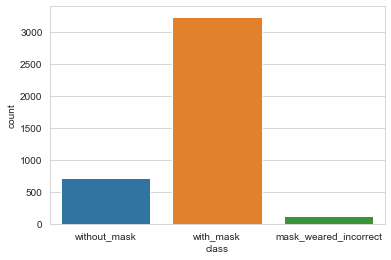

In [4]:
sn.set_style('whitegrid')
sn.countplot('class',data=df)
df['class'].value_counts()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df, df['class'], stratify=df['class'])

In [7]:
x_train['class'].value_counts(normalize=True)

with_mask                0.793713
without_mask             0.176162
mask_weared_incorrect    0.030124
Name: class, dtype: float64

## Creating Training dataset

### with_mask

In [8]:
temp = x_train.groupby(by = 'class').get_group('with_mask')

In [9]:
temp

,class,xmin,ymin,xmax,ymax,filename
317,with_mask,293,56,310,75,maksssksksss158.png
1146,with_mask,207,120,223,135,maksssksksss305.png
3626,with_mask,172,24,179,32,maksssksksss773.png
2015,with_mask,192,90,212,109,maksssksksss486.png
1463,with_mask,427,29,454,54,maksssksksss373.png
...,...,...,...,...,...,...
3316,with_mask,349,92,365,111,maksssksksss706.png
3143,with_mask,228,79,243,98,maksssksksss684.png
2407,with_mask,328,33,350,57,maksssksksss545.png
965,with_mask,394,79,398,84,maksssksksss277.png


In [41]:
for i in range(len(temp)):
    filename = temp.iloc[i,5]
    ymin = temp.iloc[i,2]
    ymax = temp.iloc[i,4]
    xmin = temp.iloc[i,1]
    xmax = temp.iloc[i,3]
    category = temp.iloc[i,0]
    
    img = cv2.imread(os.path.join(path_images,filename))[ymin:ymax,xmin:xmax]
    img = cv2.resize(img, (224,244))
    img_name = str(i)+'.jpg'
    cv2.imwrite(os.path.join(path_train[category],img_name),img)

### without_mask

In [42]:
temp = x_train.groupby(by = 'class').get_group('without_mask')
temp

,class,xmin,ymin,xmax,ymax,filename
2528,without_mask,35,69,55,91,maksssksksss567.png
2743,without_mask,334,23,339,29,maksssksksss603.png
801,without_mask,155,83,172,103,maksssksksss253.png
3445,without_mask,58,51,68,62,maksssksksss735.png
3442,without_mask,281,44,296,63,maksssksksss735.png
...,...,...,...,...,...,...
2884,without_mask,132,5,144,20,maksssksksss627.png
720,without_mask,274,87,287,97,maksssksksss240.png
3238,without_mask,28,109,55,147,maksssksksss698.png
75,without_mask,163,29,189,53,maksssksksss110.png


In [77]:
transformations = {0: transforms.Compose([transforms.ToPILImage(),transforms.RandomHorizontalFlip(p=1), transforms.Resize((224,224))]),
                   1: transforms.Compose([transforms.ToPILImage(),transforms.ColorJitter(brightness=.5, hue=.3), transforms.Resize((224,224))]),
                   2: transforms.Compose([transforms.ToPILImage(),transforms.RandomRotation(30), transforms.Resize((224,224))]),
                   3: transforms.Compose([transforms.ToPILImage(),transforms.RandomInvert(p=1), transforms.Resize((224,224))]),
                   4: transforms.Compose([transforms.ToPILImage(),transforms.RandomVerticalFlip(p=1), transforms.Resize((224,224))]),
                   5: transforms.Compose([transforms.ToPILImage(),transforms.RandomRotation(70), transforms.Resize((224,224))]),
                   6: transforms.Compose([transforms.ToPILImage(),transforms.RandomRotation(50), transforms.Resize((224,224))]),
                   7: transforms.Compose([transforms.ToPILImage(),transforms.RandomRotation(130), transforms.Resize((224,224))]),
                   8: transforms.Compose([transforms.ToPILImage(),transforms.RandomRotation(110), transforms.Resize((224,224))]),
                   9: transforms.Compose([transforms.ToPILImage(),transforms.RandomPerspective(distortion_scale=0.5, p=1, interpolation=3, fill=0), transforms.Resize((224,224))])
                  }

In [72]:
for i in range(len(temp)):
    filename = temp.iloc[i,5]
    ymin = temp.iloc[i,2]
    ymax = temp.iloc[i,4]
    xmin = temp.iloc[i,1]
    xmax = temp.iloc[i,3]
    category = temp.iloc[i,0]
    
    img = cv2.imread(os.path.join(path_images,filename))[ymin:ymax,xmin:xmax]
    
    img_name = str(i)
    write_path = path_train[category]
                              
    cv2.imwrite(os.path.join(write_path,img_name+'.png'),cv2.resize(img,(224,224)))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    for k in range(4):
        aug_img = transformations[k](img)
        aug_img.save(os.path.join(write_path,img_name+chr(97+k)+'.png'))

### mask worn incorrectly

In [78]:
temp = x_train.groupby(by = 'class').get_group('mask_weared_incorrect')
temp

,class,xmin,ymin,xmax,ymax,filename
291,mask_weared_incorrect,181,40,203,67,maksssksksss156.png
3020,mask_weared_incorrect,255,36,273,54,maksssksksss657.png
3571,mask_weared_incorrect,157,80,165,94,maksssksksss76.png
449,mask_weared_incorrect,134,118,143,128,maksssksksss199.png
3129,mask_weared_incorrect,249,43,266,65,maksssksksss680.png
...,...,...,...,...,...,...
386,mask_weared_incorrect,237,86,277,135,maksssksksss176.png
372,mask_weared_incorrect,331,77,356,106,maksssksksss173.png
2966,mask_weared_incorrect,21,40,66,87,maksssksksss647.png
767,mask_weared_incorrect,26,42,59,85,maksssksksss250.png


In [80]:
for i in range(len(temp)):
    filename = temp.iloc[i,5]
    ymin = temp.iloc[i,2]
    ymax = temp.iloc[i,4]
    xmin = temp.iloc[i,1]
    xmax = temp.iloc[i,3]
    category = temp.iloc[i,0]
    
    img = cv2.imread(os.path.join(path_images,filename))[ymin:ymax,xmin:xmax]
    
    img_name = str(i)
    write_path = path_train[category]
                              
    cv2.imwrite(os.path.join(write_path,img_name+'.png'),cv2.resize(img,(224,224)))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    for k in range(10):
        aug_img = transformations[k](img)
        aug_img.save(os.path.join(write_path,img_name+chr(97+k)+'.png'))

## Test Dataset

In [84]:
labels = ['with_mask', 'without_mask', 'mask_weared_incorrect']
for label in labels:
    temp = x_test.groupby(by = 'class').get_group(label)
    for i in range(len(temp)):
        filename = temp.iloc[i,5]
        ymin = temp.iloc[i,2]
        ymax = temp.iloc[i,4]
        xmin = temp.iloc[i,1]
        xmax = temp.iloc[i,3]
        category = temp.iloc[i,0]

        img = cv2.imread(os.path.join(path_images,filename))[ymin:ymax,xmin:xmax]
        img = cv2.resize(img, (224,244))
        img_name = str(i)+'.png'
        cv2.imwrite(os.path.join(path_test[category],img_name),img)

### Exporting train and test csv

In [85]:
x_train.to_csv('train_data.csv')

In [86]:
x_test.to_csv('test_data.csv')